In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('../Data/realData/CombinedData.csv')

In [4]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


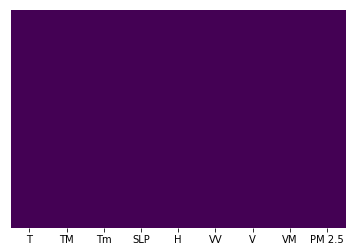

In [10]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [12]:
df = df.dropna()

In [13]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Regressor=LinearRegression()
MSE = cross_val_score(Regressor,X,y,scoring='neg_mean_squared_error',cv=5)
Mean = np.mean(MSE)
print(Mean)

-3499.356187290209


In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [16]:
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridgeRegressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [17]:
ridgeRegressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
print(ridgeRegressor.best_params_)
print(ridgeRegressor.best_score_)

{'alpha': 40}
-3354.6171573071274


In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [22]:
lasso = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lassoRegressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [23]:
lassoRegressor.fit(X,y)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900776.9338018196, tolerance: 424.6893591679955
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 811011.9930348126, tolerance: 387.0578859777605
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894478.7576780975, tolerance: 411.01572370583324
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 773500.1034514761, tolerance: 369.5785645554485

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [24]:
print(lassoRegressor.best_params_)
print(lassoRegressor.best_score_)

{'alpha': 5}
-3356.4102569706833


In [27]:
pred = lassoRegressor.predict(X_test)

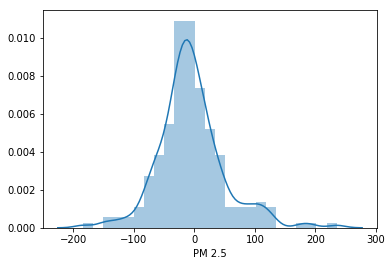

In [28]:
sns.distplot(y_test-pred)

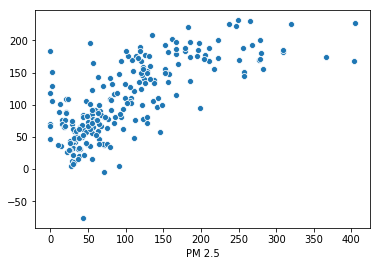

In [29]:
sns.scatterplot(y_test,pred)

In [30]:
import pickle

In [31]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lassoRegressor, file)

In [32]:
!pip install jupytext --upgrade

  Created wheel for jupytext: filename=jupytext-1.5.0-py3-none-any.whl size=281859 sha256=b16ff09269b2bfcf11d50a14dcf8aae02f53f56b1f33cb347af24dd086c238b5
  Stored in directory: c:\users\obedj\appdata\local\pip\cache\wheels\97\db\14\3b758277037dcfbfc3dba761097102da6226f6b9742ba3e0e6
Successfully built jupytext


In [33]:
!jupyter notebook --generate-config

Writing default config to: C:\Users\obedj\.jupyter\jupyter_notebook_config.py
